# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approve

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


# Import some useful Libraries

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")



import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

## 1.1 Reading Data

In [2]:
import pandas as pd

project_data=pd.read_csv("train_data.csv")
resource_data=pd.read_csv("resources.csv")

In [3]:
project_data.head(3)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0


In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
print("Number of data points in resources data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in resources data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [6]:
# Print some train dataframe

project_data.head(3)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0


## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data["project_subject_categories"].values)

# remove special characters from list of strings

cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))
print(sorted_cat_dict)

project_data.head()

{'Warmth': 1388, 'Care_Hunger': 1388, 'History_Civics': 5914, 'Music_Arts': 10293, 'AppliedLearning': 12135, 'SpecialNeeds': 13642, 'Health_Sports': 14223, 'Math_Science': 41421, 'Literacy_Language': 52239}


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,Health_Sports
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1,Literacy_Language Math_Science
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1,Math_Science


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

print(sorted_sub_cat_dict)

project_data.head()

{'Economics': 269, 'CommunityService': 441, 'FinancialLiteracy': 568, 'ParentInvolvement': 677, 'Extracurricular': 810, 'Civics_Government': 815, 'ForeignLanguages': 890, 'NutritionEducation': 1355, 'Warmth': 1388, 'Care_Hunger': 1388, 'SocialSciences': 1920, 'PerformingArts': 1961, 'CharacterEducation': 2065, 'TeamSports': 2192, 'Other': 2372, 'College_CareerPrep': 2568, 'Music': 3145, 'History_Geography': 3171, 'Health_LifeScience': 4235, 'EarlyDevelopment': 4254, 'ESL': 4367, 'Gym_Fitness': 4509, 'EnvironmentalScience': 5591, 'VisualArts': 6278, 'Health_Wellness': 10234, 'AppliedSciences': 10816, 'SpecialNeeds': 13642, 'Literature_Writing': 22179, 'Mathematics': 28074, 'Literacy': 33700}


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,Health_Sports,Health_Wellness TeamSports
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1,Literacy_Language Math_Science,Literacy Mathematics
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1,Math_Science,Mathematics


In [9]:
project_grade_category = list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

project_grad_cat_list = []
for i in project_grade_category:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    project_grad_cat_list.append(temp.strip())

project_data['clean_project_grade_category'] = project_grad_cat_list
project_data.drop(['project_grade_category'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_project_grade_category'].values:
    my_counter.update(word.split())
    
project_grade_cat_dict = dict(my_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))

print(sorted_project_grade_cat_dict)

project_data.head()

{'Grades9-12': 10963, 'Grades6-8': 16923, 'Grades3-5': 37137, 'GradesPreK-2': 44225}


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,clean_project_grade_category
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,GradesPreK-2
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Grades6-8
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,Health_Sports,Health_Wellness TeamSports,Grades6-8
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1,Literacy_Language Math_Science,Literacy Mathematics,GradesPreK-2
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1,Math_Science,Mathematics,GradesPreK-2


## 1.3 Text preprocessing

# [1.3.1] Essays

In [10]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [11]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,clean_project_grade_category,essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,GradesPreK-2,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Grades6-8,Our students arrive to our school eager to lea...


In [12]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

The mediocre teacher tells. The good teacher explains. The superior teacher demonstrates. The great teacher inspires. -William A. Ward\r\n\r\nMy school has 803 students which is makeup is 97.6% African-American, making up the largest segment of the student body. A typical school in Dallas is made up of 23.2% African-American students. Most of the students are on free or reduced lunch. We aren't receiving doctors, lawyers, or engineers children from rich backgrounds or neighborhoods. As an educator I am inspiring minds of young children and we focus not only on academics but one smart, effective, efficient, and disciplined students with good character.In our classroom we can utilize the Bluetooth for swift transitions during class. I use a speaker which doesn't amplify the sound enough to receive the message. Due to the volume of my speaker my students can't hear videos or books clearly and it isn't making the lessons as meaningful. But with the bluetooth speaker my students will be abl

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [17]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:49<00:00, 2219.61it/s]


In [19]:
# Merging preprocessed_essays in project_data

project_data['cleaned_essays'] = preprocessed_essays

project_data.head(3)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,clean_project_grade_category,essay,cleaned_essays
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,GradesPreK-2,My students are English learners that are work...,my students english learners working english s...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Grades6-8,Our students arrive to our school eager to lea...,our students arrive school eager learn they po...
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,Health_Sports,Health_Wellness TeamSports,Grades6-8,"\r\n\""True champions aren't always the ones th...",true champions not always ones win guts by mia...


# [1.3.2] Title

In [20]:


# Data preprocessing on title text
from tqdm import tqdm
import re
import string
from bs4 import BeautifulSoup
preprocessed_title_text = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = re.sub("\S*\d\S*", "", sent).strip()
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title_text.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:02<00:00, 39430.87it/s]


In [21]:
project_data = pd.DataFrame(project_data)
project_data['cleaned_title_text'] = preprocessed_title_text

project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,clean_project_grade_category,essay,cleaned_essays,cleaned_title_text
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,GradesPreK-2,My students are English learners that are work...,my students english learners working english s...,educational support english learners home
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Grades6-8,Our students arrive to our school eager to lea...,our students arrive school eager learn they po...,wanted projector hungry learners


# [1.4] Process Resource Data

In [22]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [23]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [24]:
# Check for Null values in price data
price_data.isnull().any().any()

False

In [25]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('null')
 
project_data.head(2)


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,clean_project_grade_category,essay,cleaned_essays,cleaned_title_text
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,GradesPreK-2,My students are English learners that are work...,my students english learners working english s...,educational support english learners home
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Grades6-8,Our students arrive to our school eager to lea...,our students arrive school eager learn they po...,wanted projector hungry learners


# Join train & Resource dataset

In [26]:
# join two dataframes in python: 
data = pd.merge(project_data, price_data, on='id', how='left')

In [27]:
approved_price = data[data['project_is_approved']==1]['price'].values

rejected_price = data[data['project_is_approved']==0]['price'].values

In [28]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
import numpy as np


t = PrettyTable()
t.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    t.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(t)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.59       |          41.9         |
|     10     |       33.88       |         73.67         |
|     15     |        58.0       |         99.109        |
|     20     |       77.38       |         118.56        |
|     25     |       99.95       |        140.892        |
|     30     |       116.68      |         162.23        |
|     35     |      137.232      |        184.014        |
|     40     |       157.0       |        208.632        |
|     45     |      178.265      |        235.106        |
|     50     |       198.99      |        263.145        |
|     55     |       223.99      |         292.61        |
|     60     |       255.63      |        325.144        |
|     65     |      285.412      |         362.39       

In [29]:
data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_title,project_essay_1,project_essay_2,project_essay_3,...,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,clean_project_grade_category,essay,cleaned_essays,cleaned_title_text,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,...,0,0,Literacy_Language,ESL Literacy,GradesPreK-2,My students are English learners that are work...,my students english learners working english s...,educational support english learners home,154.6,23
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Grades6-8,Our students arrive to our school eager to lea...,our students arrive school eager learn they po...,wanted projector hungry learners,299.0,1


# SentimentIntensityAnalyzer

In [30]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
neg=[]
neut=[]
pos=[]
comp=[]
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())
    ss = sid.polarity_scores(sent.lower().strip())
    neg.append(ss['neg'])
    neut.append(ss['neu'])
    pos.append(ss['pos'])
    comp.append(ss['compound'])
    

100%|██████████| 109248/109248 [03:30<00:00, 518.58it/s]


In [31]:
# after preprocesing
preprocessed_essays[20000]


'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

In [32]:
essay_len=[]
title_len=[]
for x in range(len(preprocessed_essays)):
    essay_len.append(len(preprocessed_essays[x]))
    title_len.append(len(preprocessed_title_text[x]))

In [33]:
data['neg']=neg
data['neut']=neut
data['pos']=pos
data['comp']=comp
data['essay_len']=essay_len
data['title_len']=title_len

data.head(3)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_title,project_essay_1,project_essay_2,project_essay_3,...,cleaned_essays,cleaned_title_text,price,quantity,neg,neut,pos,comp,essay_len,title_len
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,...,my students english learners working english s...,educational support english learners home,154.60,23,0.012,0.844,0.144,0.9694,1121,41
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,...,our students arrive school eager learn they po...,wanted projector hungry learners,299.00,1,0.048,0.669,0.283,0.9856,814,32
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,...,true champions not always ones win guts by mia...,soccer equipment awesome middle school students,516.85,22,0.122,0.659,0.219,0.9816,1441,47


# <h1> Train Test split</h1>

In [34]:
project_data = data.sample(n=50000)

In [35]:
# Define x & y for splitting

y=project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)      # drop project is approved columns  

x=project_data

# One Hot Encoding of Categorical Data

In [36]:
# OHE of subject category
from sklearn.feature_extraction.text import CountVectorizer
vectorizer1 = CountVectorizer()
vectorizer1.fit(x['clean_categories'].values) # fit has to happen only on train data


# we use the fitted CountVectorizer to convert the text to vector
x_clean_cat_ohe = vectorizer1.transform(x['clean_categories'].values)


print("After vectorizations")
print(x_clean_cat_ohe.shape)

print(vectorizer1.get_feature_names())
print("="*100)

After vectorizations
(50000, 9)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [37]:
# ONE of subject subcategory

vectorizer2 = CountVectorizer()
vectorizer2.fit(x['clean_subcategories'].values) # fit has to happen only on train data


# we use the fitted CountVectorizer to convert the text to vector
x_clean_subcat_ohe = vectorizer2.transform(x['clean_subcategories'].values)

print("After vectorizations")
print(x_clean_subcat_ohe.shape)

print(vectorizer2.get_feature_names())
print("="*100)

After vectorizations
(50000, 30)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [38]:
# one hot encoding the catogorical features: categorical_categories
# teacher_prefix

vectorizer3 = CountVectorizer()
vectorizer3.fit(x['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_teacher_pre = vectorizer3.transform(x['teacher_prefix'].values)

print("After vectorizations")
print(x_teacher_pre.shape)

print(vectorizer3.get_feature_names())
print("="*100)


After vectorizations
(50000, 6)
['dr', 'mr', 'mrs', 'ms', 'null', 'teacher']


In [39]:
# school_state

vectorizer4 = CountVectorizer()
vectorizer4.fit(x['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_state_ohe = vectorizer4.transform(x['school_state'].values)

print("After vectorizations")
print(x_state_ohe.shape)

print(vectorizer4.get_feature_names())
print("="*100)

After vectorizations
(50000, 51)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [40]:
# ONE of subject subcategory

vectorizer5 = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
vectorizer5.fit(x['clean_project_grade_category'].values) # fit has to happen only on train data


# we use the fitted CountVectorizer to convert the text to vector
x_grade_ohe = vectorizer5.transform(x['clean_project_grade_category'].values)

print("After vectorizations")
print(x_grade_ohe.shape)

print(vectorizer5.get_feature_names())
print("="*100)

After vectorizations
(50000, 4)
['Grades9-12', 'Grades6-8', 'Grades3-5', 'GradesPreK-2']


# Standardize Numerical data

In [41]:
x.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'clean_project_grade_category', 'essay',
       'cleaned_essays', 'cleaned_title_text', 'price', 'quantity', 'neg',
       'neut', 'pos', 'comp', 'essay_len', 'title_len'],
      dtype='object')

In [42]:
# Standarized the numerical features: Price

from sklearn.preprocessing import Normalizer
price_scalar = Normalizer()
price_scalar.fit(x['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

x_price_std = price_scalar.transform(x['price'].values.reshape(-1,1))


print("After vectorizations")
print(x_price_std.shape)



After vectorizations
(50000, 1)


In [43]:
# Standarized the numerical features: teacher_previously

from sklearn.preprocessing import Normalizer
teacher_previously_scalar = Normalizer()
teacher_previously_scalar.fit(x['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

x_teacher_previously_std = teacher_previously_scalar.transform(x['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(x_teacher_previously_std.shape)



After vectorizations
(50000, 1)


In [44]:
# Standarized the numerical features:quantity

from sklearn.preprocessing import StandardScaler
quantity_scalar = Normalizer()
quantity_scalar.fit(x['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

x_quantity_std = quantity_scalar.transform(x['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(x_quantity_std.shape)



After vectorizations
(50000, 1)


# SET  : TF-IDF

In [45]:
# On Clean Essay

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer8 = TfidfVectorizer(min_df=10,ngram_range = (1,4),max_features=5000)
preprocessed_essays_tfidf = vectorizer8.fit_transform(x['cleaned_essays'])
print("Shape of matrix after one hot encodig ",preprocessed_essays_tfidf.shape)



Shape of matrix after one hot encodig  (50000, 5000)


In [46]:
# On Clean_title 

vectorizer9 = TfidfVectorizer(min_df=10,ngram_range = (1,4),max_features=5000)
preprocessed_title_tfidf = vectorizer9.fit_transform(x['cleaned_title_text'])
print("Shape of matrix after one hot encodig ",preprocessed_title_tfidf.shape)



Shape of matrix after one hot encodig  (50000, 4147)


In [47]:
# Concatenate TFIDF
from scipy.sparse import hstack
X_tfidf=hstack((preprocessed_essays_tfidf,preprocessed_title_tfidf,x_clean_cat_ohe,x_clean_subcat_ohe,x_state_ohe,x_teacher_pre,x_grade_ohe,x_price_std,x_teacher_previously_std
                   ,x_quantity_std )).tocsr()


print(X_tfidf.shape)


(50000, 9250)


# K-Means Clustering: 

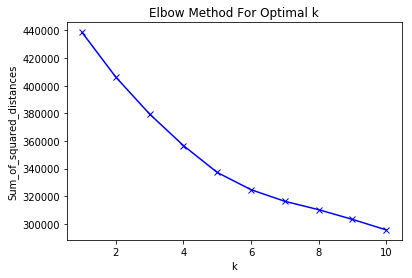

In [54]:
from sklearn.cluster import KMeans

n_clusters = [1,2,3,4,5,6,7,8,9,10]


Sum_of_squared_distances = []
for i in n_clusters:
    
    kMeans = KMeans(n_clusters = i,verbose=21,n_jobs=8,random_state=0)
    kMeans.fit(X_tfidf)
    Sum_of_squared_distances.append(kMeans.inertia_)   # Sum of squared distances of samples to their closest cluster center.

        
plt.plot(n_clusters, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()



# Select Best n_clusters ie, K=5 as per above diagram by using Elbow/Knee Method

In [55]:
kMeans_new = KMeans(n_clusters = 5,verbose=21,n_jobs=8,random_state=0)
kMeans_new.fit(X_tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=8, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=21)

# Summarize each cluster by manually observing few points from each cluster.

In [68]:
clean_essays = x["cleaned_essays"].values

cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []

for k in range(kMeans_new.labels_.shape[0]):
    if kMeans_new.labels_[k] == 0:
        cluster1.append(clean_essays[k])
    elif kMeans_new.labels_[k] == 1:
        cluster2.append(clean_essays[k])
    elif kMeans_new.labels_[k] == 2:
        cluster3.append(clean_essays[k])
    elif kMeans_new.labels_[k] == 3:
        cluster4.append(clean_essays[k])
    elif kMeans_new.labels_[k] == 4:
        cluster5.append(clean_essays[k])
        
print("Number of data points of essays in cluster 1 :",len(cluster1))
print("Number of data points of essays in cluster 2 :",len(cluster2))
print("Number of data points of essays in cluster 3 :",len(cluster3))
print("Number of data points of essays in cluster 4 :",len(cluster4))
print("Number of data points of essays in cluster 5 :",len(cluster5))




Number of data points of essays in cluster 1 : 2459
Number of data points of essays in cluster 2 : 22618
Number of data points of essays in cluster 3 : 21301
Number of data points of essays in cluster 4 : 2007
Number of data points of essays in cluster 5 : 1615


# Plotting Word Cloud for each cluster of Kmeans

Word Cloud for clusters:


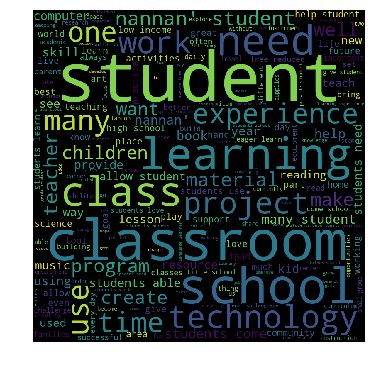

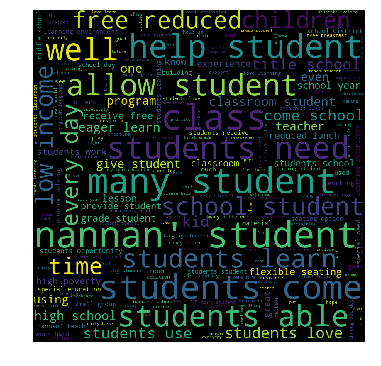

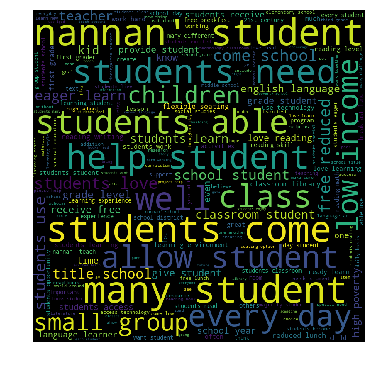

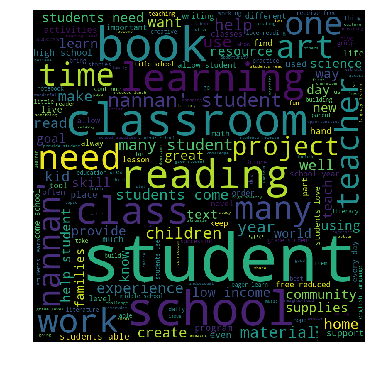

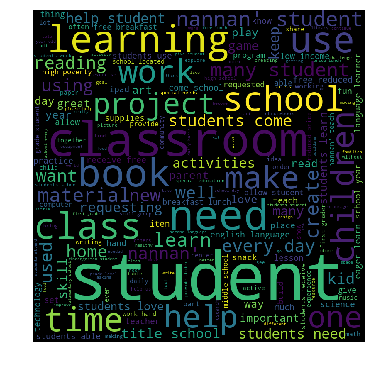

In [93]:
# for cluster 1,2,3,4 & 5 respectively

from wordcloud import WordCloud
essays_wc = [cluster1 ,cluster2,cluster3,cluster4,cluster5]
print("Word Cloud for clusters:")
for j in range(0,5):
    word=str(essays_wc[j])
    wordcloud4 = WordCloud(width = 800, height = 800, 
                background_color ='black').generate(word) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (5, 5), facecolor = None)
    
    plt.imshow(wordcloud4) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

# Agglomerative Clustering

In [94]:
# For n_clusters = 2

from sklearn.cluster import AgglomerativeClustering

Agg2 = KMeans(n_clusters = 2)
Agg2.fit(X_tfidf[0:5000])



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [97]:
clean_essays = x["cleaned_essays"][0:5000].values

cluster1 = []
cluster2 = []

for k in range(Agg2.labels_.shape[0]):
    if Agg2.labels_[k] == 0:
        cluster1.append(clean_essays[k])
    elif Agg2.labels_[k] == 1:
        cluster2.append(clean_essays[k])
   
        
print("Number of data points of essays in cluster 1 :",len(cluster1))
print("Number of data points of essays in cluster 2 :",len(cluster2))





Number of data points of essays in cluster 1 : 4788
Number of data points of essays in cluster 2 : 212


Word Cloud for clusters:


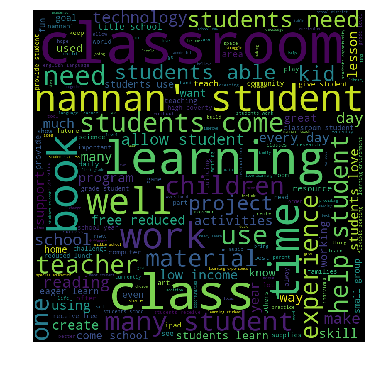

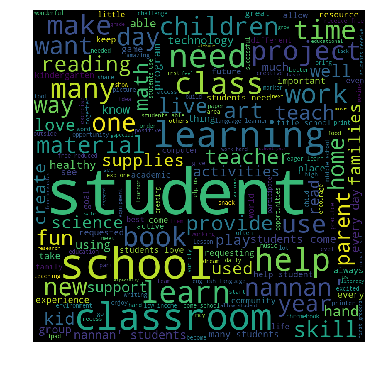

IndexError: list index out of range

In [98]:
# for cluster 1,2,3,4 & 5 respectively

from wordcloud import WordCloud
essays_wc_agg = [cluster1 ,cluster2]
print("Word Cloud for clusters:")
for j in range(0,5):
    word=str(essays_wc_agg[j])
    wordcloud4 = WordCloud(width = 800, height = 800, 
                background_color ='black').generate(word) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (5, 5), facecolor = None)
    
    plt.imshow(wordcloud4) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

In [100]:
# AgglomerativeClustering for n_cluster = 5

from sklearn.cluster import AgglomerativeClustering

Agg5 = KMeans(n_clusters = 5)
Agg5.fit(X_tfidf[0:5000])



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [101]:
clean_essays = x["cleaned_essays"][0:5000].values

cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []

for k in range(Agg5.labels_.shape[0]):
    if Agg5.labels_[k] == 0:
        cluster1.append(clean_essays[k])
    elif Agg5.labels_[k] == 1:
        cluster2.append(clean_essays[k])
    elif Agg5.labels_[k] == 2:
        cluster3.append(clean_essays[k])
    elif Agg5.labels_[k] == 3:
        cluster4.append(clean_essays[k])
    elif Agg5.labels_[k] == 4:
        cluster5.append(clean_essays[k])
        
print("Number of data points of essays in cluster 1 :",len(cluster1))
print("Number of data points of essays in cluster 2 :",len(cluster2))
print("Number of data points of essays in cluster 3 :",len(cluster3))
print("Number of data points of essays in cluster 4 :",len(cluster4))
print("Number of data points of essays in cluster 5 :",len(cluster5))




Number of data points of essays in cluster 1 : 185
Number of data points of essays in cluster 2 : 2152
Number of data points of essays in cluster 3 : 2119
Number of data points of essays in cluster 4 : 181
Number of data points of essays in cluster 5 : 363


Word Cloud for clusters:


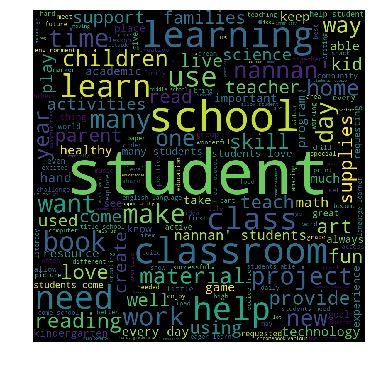

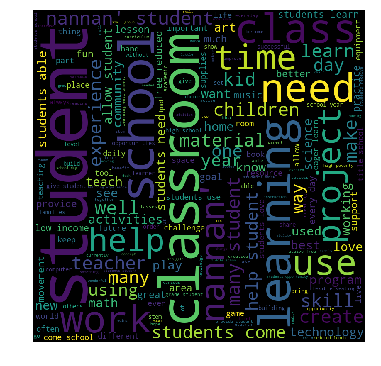

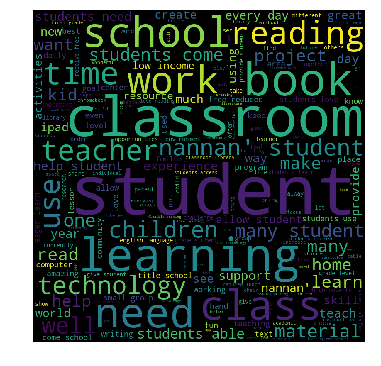

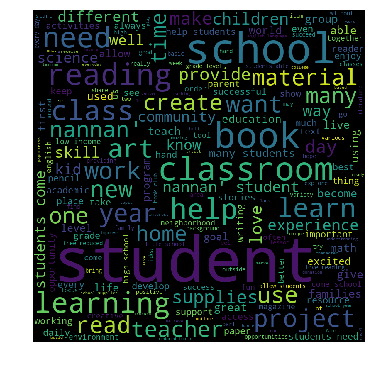

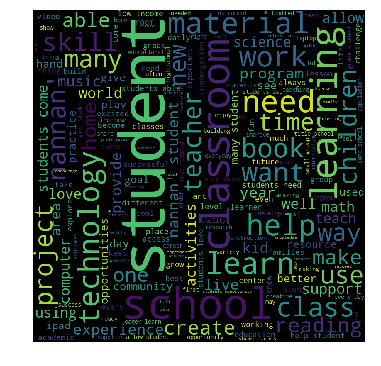

In [102]:
# for cluster 1,2,3,4 & 5 respectively

from wordcloud import WordCloud
essays_wc = [cluster1 ,cluster2,cluster3,cluster4,cluster5]
print("Word Cloud for clusters:")
for j in range(0,5):
    word=str(essays_wc[j])
    wordcloud4 = WordCloud(width = 800, height = 800, 
                background_color ='black').generate(word) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (5, 5), facecolor = None)
    
    plt.imshow(wordcloud4) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

# DBSCAN Clustering:

<h3> Select best dimensions</h3>

In [56]:
# Take 920 dimensions out of total d
# 50000/9200 = 5.4 ----- 20000/3700 = 5.4

from sklearn.feature_selection import SelectKBest, chi2

Selector = SelectKBest(chi2,k=1000)
Selector.fit(X_tfidf,y)

X_tfidf_sample = Selector.transform(X_tfidf) 
print(X_tfidf_sample.shape)

X_tfidf_new = X_tfidf_sample[0:20000]
print(X_tfidf_new.shape)

(50000, 1000)
(20000, 1000)


<h3> Finding best eps for DBSCAN by elbow method

In [57]:
# For finding best eps we plot a graph between point index and distance of Nearest Neighbor for each point where NN = min_sample
min_samples = 2*X_tfidf_new.shape[1]

from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=min_samples)
neigh.fit(X_tfidf_new)



NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=2000, p=2,
         radius=1.0)

In [58]:
distances = neigh.kneighbors(X_tfidf_new,n_neighbors =min_samples)
distances_sort = np.sort(distances)
print(distances_sort)

[[[0.00000000e+00 1.36573000e+00 1.37484645e+00 ... 2.49554379e+00
   2.49563300e+00 2.49576434e+00]
  [0.00000000e+00 5.81723308e-01 1.07903982e+00 ... 2.12810897e+00
   2.12816326e+00 2.12831163e+00]
  [0.00000000e+00 4.30335187e-01 4.72400369e-01 ... 1.85863005e+00
   1.85863512e+00 1.85868275e+00]
  ...
  [0.00000000e+00 5.84604665e-01 6.66774147e-01 ... 2.40429189e+00
   2.40445608e+00 2.40448393e+00]
  [0.00000000e+00 6.79119146e-01 6.95412961e-01 ... 1.97255823e+00
   1.97314391e+00 1.97330657e+00]
  [0.00000000e+00 5.87530003e-01 7.79369994e-01 ... 2.43355223e+00
   2.43391969e+00 2.43421105e+00]]

 [[0.00000000e+00 1.00000000e+00 9.00000000e+00 ... 1.99750000e+04
   1.99810000e+04 1.99880000e+04]
  [1.00000000e+00 9.00000000e+00 4.50000000e+01 ... 1.99820000e+04
   1.99880000e+04 1.99930000e+04]
  [2.00000000e+00 4.00000000e+00 3.90000000e+01 ... 1.99560000e+04
   1.99640000e+04 1.99900000e+04]
  ...
  [1.50000000e+01 1.60000000e+01 1.70000000e+01 ... 1.99870000e+04
   1.99920

In [59]:
# attribute kneighbors gives two array first is for distances and second for index of points for corresponding distances
final_distances = distances_sort[0]
final_distances

array([[0.        , 1.36573   , 1.37484645, ..., 2.49554379, 2.495633  ,
        2.49576434],
       [0.        , 0.58172331, 1.07903982, ..., 2.12810897, 2.12816326,
        2.12831163],
       [0.        , 0.43033519, 0.47240037, ..., 1.85863005, 1.85863512,
        1.85868275],
       ...,
       [0.        , 0.58460466, 0.66677415, ..., 2.40429189, 2.40445608,
        2.40448393],
       [0.        , 0.67911915, 0.69541296, ..., 1.97255823, 1.97314391,
        1.97330657],
       [0.        , 0.58753   , 0.77936999, ..., 2.43355223, 2.43391969,
        2.43421105]])

In [60]:
distances_NN = np.sort(final_distances[:,-1],axis= None)
distances_NN

array([1.47131287, 1.47276772, 1.47326049, ..., 3.01634859, 3.01876568,
       3.15421696])

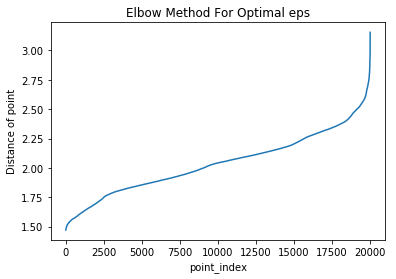

In [61]:
# Plot Curve
point_index = [i for i in range(X_tfidf_new.shape[0])]

plt.plot(point_index, distances_NN)
plt.xlabel('point_index')
plt.ylabel('Distance of point')
plt.title('Elbow Method For Optimal eps')
plt.show()




<h3> From above plot it is clear optimal eps = 2.5

In [64]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2.25,min_samples=min_samples,n_jobs=10)  # take min_smaples = ln(n) ie, ln(5000)=8.5
dbscan.fit(X_tfidf_new)

DBSCAN(algorithm='auto', eps=2.25, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2000, n_jobs=10, p=None)

In [65]:
clean_essays = x["cleaned_essays"][0:20000].values

cluster_non_noise = []
cluster_noise =[]
for k in range(dbscan.labels_.shape[0]):
    if dbscan.labels_[k] == 0:
        cluster_non_noise.append(clean_essays[k])
    elif dbscan.labels_[k] == -1:
        cluster_noise.append(clean_essays[k])
   
        
print("Number of non-noise data points of essays in cluster  :",len(cluster_non_noise))
print("Number of noise data points of essays in cluster  :",len(cluster_noise))




Number of non-noise data points of essays in cluster  : 19968
Number of noise data points of essays in cluster  : 32


Word Cloud for clusters:


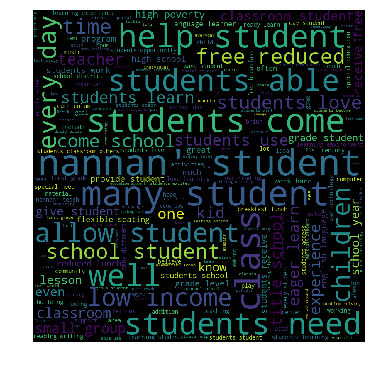

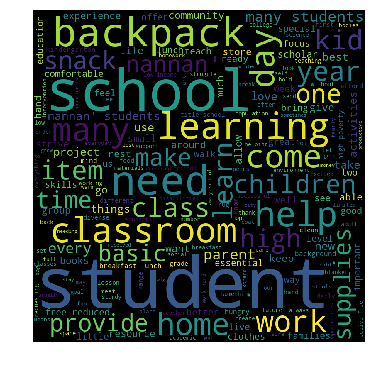

In [67]:
# for cluster 1,2,3,4 & 5 respectively

from wordcloud import WordCloud
essays_wc = [cluster_non_noise ,cluster_noise]
print("Word Cloud for clusters:")
for j in range(0,2):
    word=str(essays_wc[j])
    wordcloud4 = WordCloud(width = 800, height = 800, 
                background_color ='black').generate(word) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (5, 5), facecolor = None)
    
    plt.imshow(wordcloud4) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

# ....................................... END OF NoteBook .......................................................